In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid
from pyolin.analysis import score_table
from pyolin.analysis import similarity_table
from pyolin.analysis import compatibility_table
from pyolin.analysis import all_paths

from pyolin.gate import Gate

import matplotlib.pyplot as plt
plt.ioff()

import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv').rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(raw)

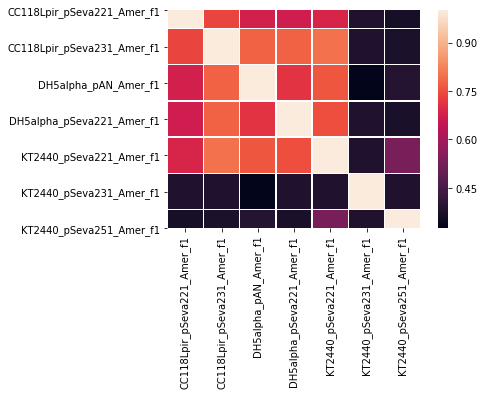

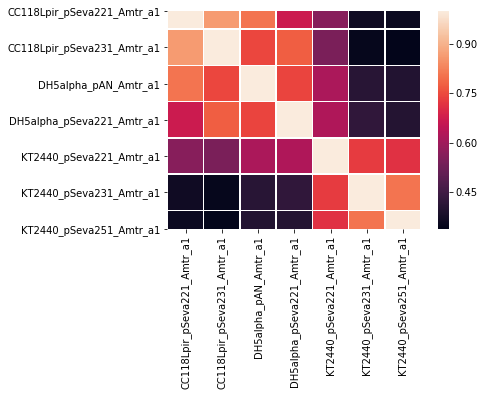

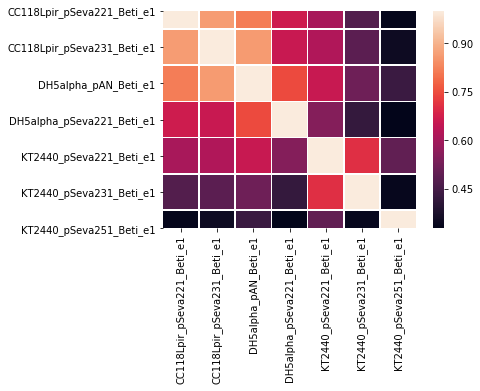

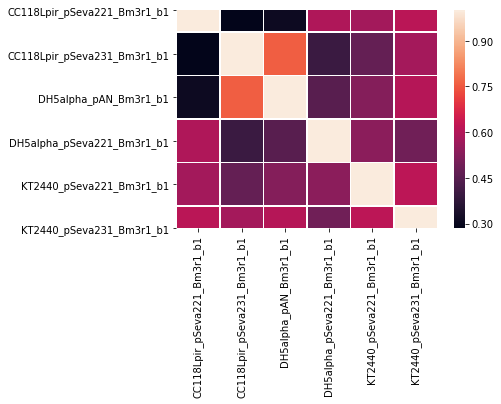

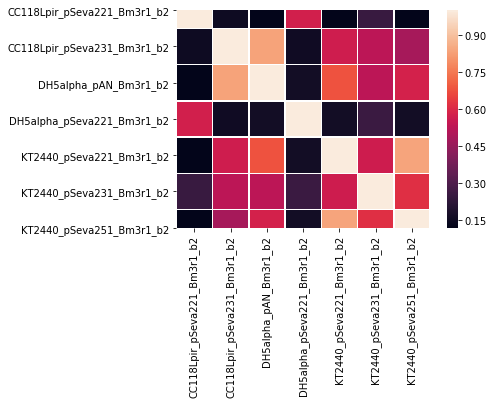

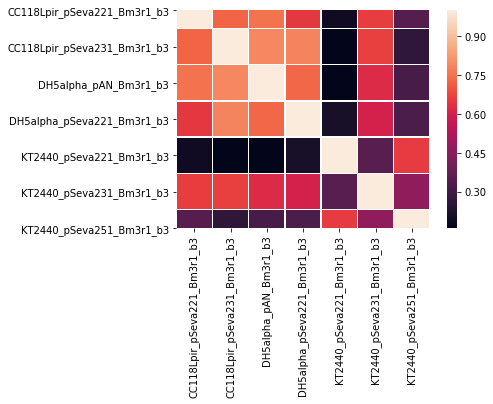

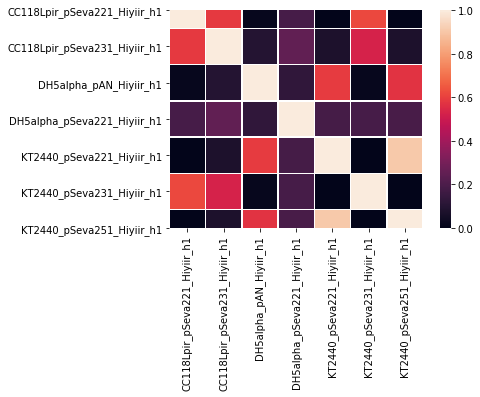

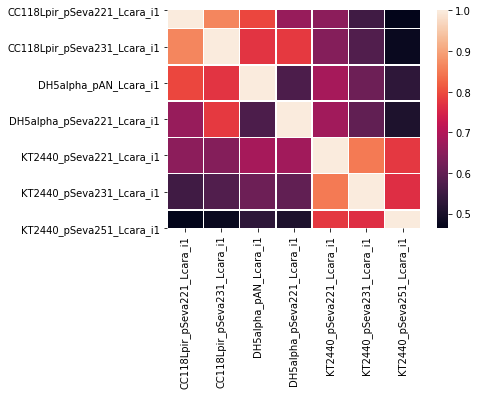

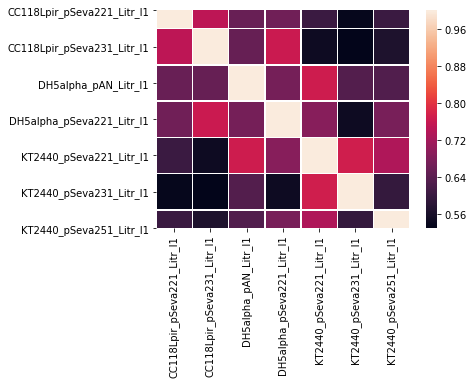

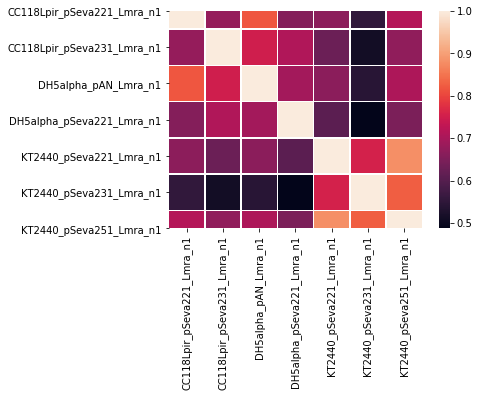

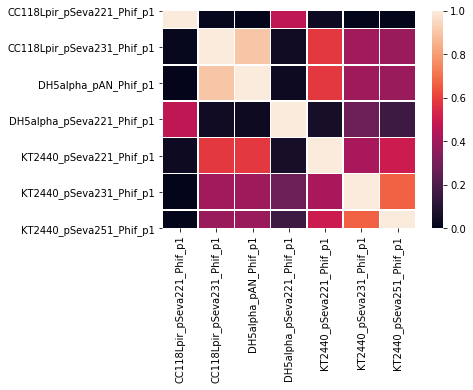

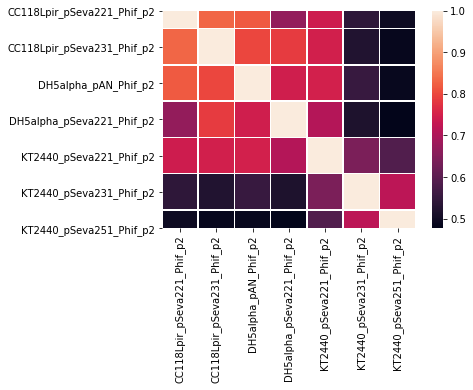

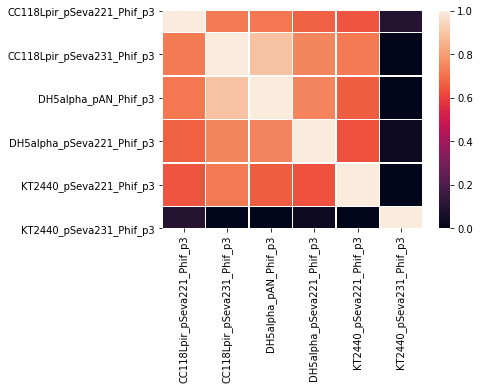

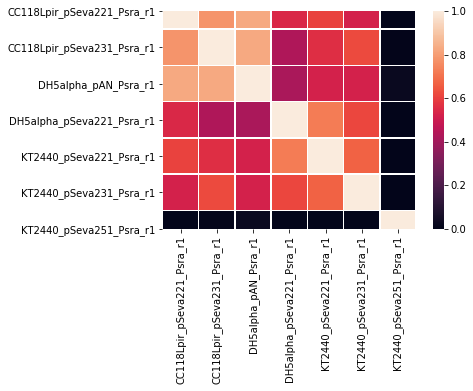

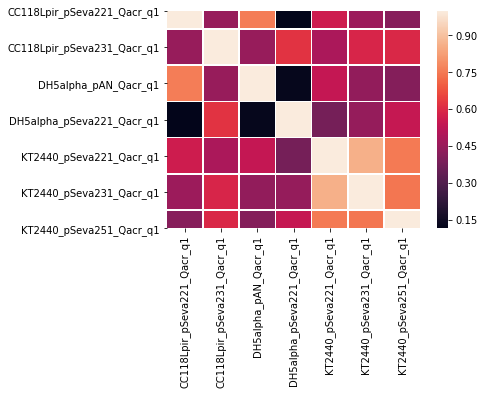

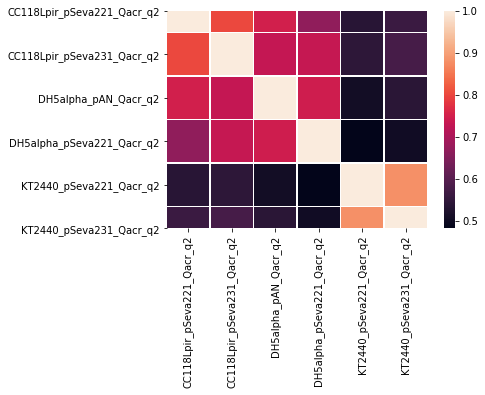

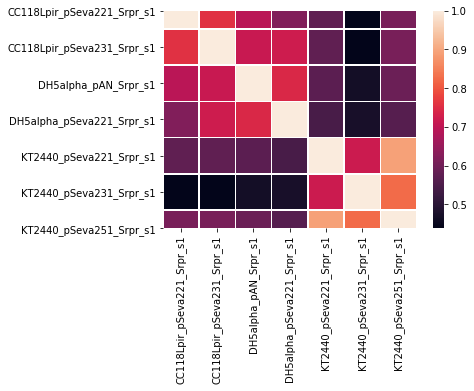

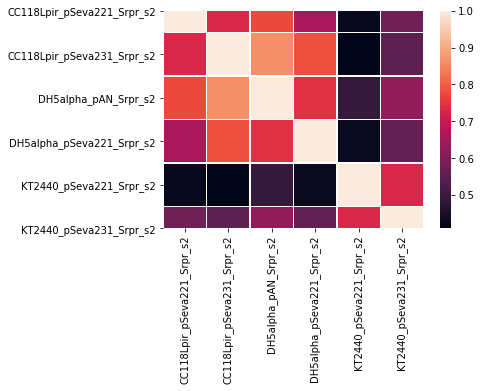

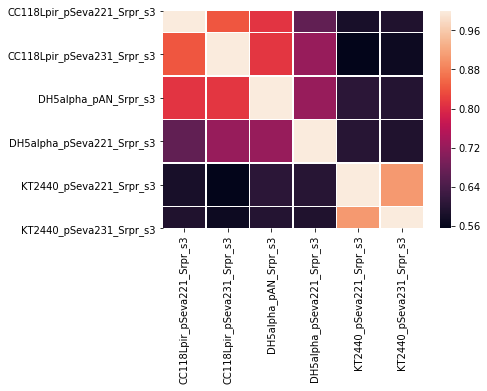

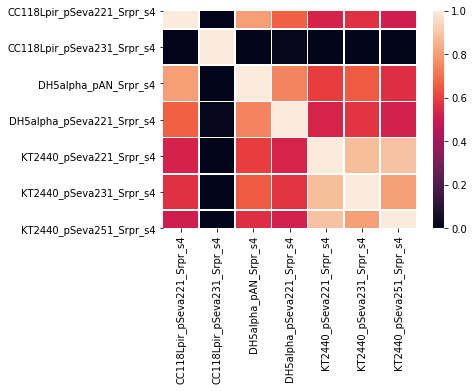

In [2]:
import seaborn

cargoes = data.plasmids[3:]
for cargo in cargoes:
    plt.figure()
    similarity_heatmap(data[::cargo])
    plt.savefig(f"results/similarity_heatmap_{cargo}_across_contexts.eps")

True


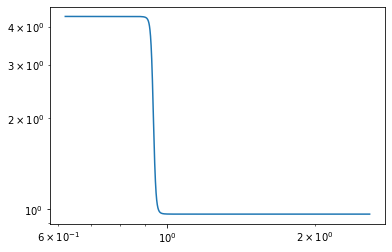

In [6]:
f1 = data['CC118Lpir':'pSeva221':'Amer_f1']
p3 = data['CC118Lpir':'pSeva221':'Phif_p3']
r1 = data['CC118Lpir':'pSeva221':'Psra_r1']

print(r1.is_compatible_with(p3) and p3.is_compatible_with(f1))

def composite_hill(gates):
    if len(gates) == 1:
        return gates[0].hill_function
    else:
        def h(x):
            return gates[-1].hill_function(composite_hill(gates[:-1])(x))
        return h

import numpy
from math import log10
h = composite_hill([r1, p3, f1])
xs = numpy.logspace(log10(min(r1.rpu_in)), log10(max(r1.rpu_in)), 9999)
ys = [h(x) for x in xs]
plt.loglog(xs, ys)

with open('results/figure_data/Figure4/stepI.dat', 'w') as f:
    for x, y in zip(xs, ys):
        print(f"{x} {y}", file=f)

True


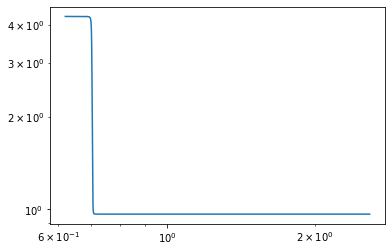

In [4]:
p3 = data['CC118Lpir':'pSeva221':'Phif_p3']
e1 = data['CC118Lpir':'pSeva231':'Beti_e1']
r1 = data['CC118Lpir':'pSeva221':'Psra_r1']
q2 = data['CC118Lpir':'pSeva231':'Qacr_q2']
f1 = data['CC118Lpir':'pSeva221':'Amer_f1']

print((p3.is_compatible_with(e1) and
      e1.is_compatible_with(r1) and
      r1.is_compatible_with(q2) and
      q2.is_compatible_with(f1)))

import numpy
from math import log10
h = composite_hill([p3, e1, r1, q2, f1])
xs = numpy.logspace(log10(min(r1.rpu_in)), log10(max(r1.rpu_in)), 9999)
ys = [h(x) for x in xs]
plt.loglog(xs, ys)

with open('results/figure_data/Figure4/stepII.dat', 'w') as f:
    for x, y in zip(xs, ys):
        print(f"{x} {y}", file=f)

In [9]:
l1 = data['DH5alpha':'pSeva221':'Litr_l1']
n1 = data['DH5alpha':'pAN':'Lmra_n1']
r1 = data['CC118Lpir':'pSeva221':'Psra_r1']
i1 = data['DH5alpha':'pAN':'Lcara_i1']
p3 = data['CC118Lpir':'pSeva221':'Phif_p3']
s1 = data['DH5alpha':'pAN':'Srpr_s4']
e1 = data['DH5alpha':'pSeva221':'Beti_e1']
h1 = data['DH5alpha':'pAN':'Hiyiir_h1']
f1 = data['CC118Lpir':'pSeva231':'Amer_f1']
q1 = data['CC118Lpir':'pSeva231':'Qacr_q1']
a1 = data['DH5alpha':'pSeva221':'Amtr_a1']
b3 = data['DH5alpha':'pSeva221':'Bm3r1_b3']

print(l1.is_compatible_with(n1))
print(n1.is_compatible_with(r1))
print(r1.is_compatible_with(i1))
print(i1.is_compatible_with(p3))
print(p3.is_compatible_with(s1))
print(s1.is_compatible_with(e1))
print(e1.is_compatible_with(h1))
print(h1.is_compatible_with(f1))
print(f1.is_compatible_with(q1))
print(q1.is_compatible_with(a1))
print(a1.is_compatible_with(b3))

True
False
True
True
True
True
True
True
True
True
False
